## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question 1**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [1]:
# import pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
# import mosquitos_data.csv
df = pd.read_csv("mosquitos_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
Response     43 non-null int64
Treatment    43 non-null object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [3]:
# Question 1 - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water)

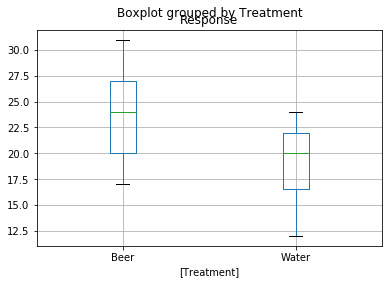

In [5]:
# Question 1 Answer
df.boxplot(by='Treatment')

In [6]:
# Question 1 - What does the graph reveal about the data for both groups?
# Question 1 - Is there an association between beer consumption and attractiveness to mosquitos?

In [7]:
# Question 1 Answer
# Graph above suggests that there is high possibility of association between beer consumption and attractiveness to mosquitos

In [8]:
# Question 1 - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

In [9]:
# Question 1 Answer - Mean
df.groupby('Treatment').mean()

,Response
Treatment,
Beer,23.600000
Water,19.222222


In [10]:
# Question 1 Answer - Mean
# 23.6 is the average count of mosquitos attracted to volunteers who consumed beer in the experiment
# 19.2 is the average count of mosquitos attracted to volunteers who consumed water in the experiment

In [11]:
# Question 1 Answer - Median
df.groupby('Treatment').median()

,Response
Treatment,
Beer,24
Water,20


In [12]:
# Question 1 Answer - Median
# 24 is the median count of mosquitos attracted to volunteers who consumed beer in the experiment
# 20 is the median count of mosquitos attracted to volunteers who consumed water in the experiment

In [13]:
# Question 1 Answer - Standard Deviation
df.groupby('Treatment').std()

,Response
Treatment,
Beer,4.133199
Water,3.671120


In [14]:
# Question 1 Answer - Standard Deviation
# 4.13 is the standard deviation of the count of mosquitos attracted to volunteers who consumed beer in the experiment
# 3.67 is the standard deviation of the count of mosquitos attracted to volunteers who consumed water in the experiment

In [15]:
# Question 2 - Write code to implement the data simulation demonstrated in the above mentioned video.

In [16]:
# Question 2 Answer
# the response mean difference is 4.38
# simulation is done 50,000 times
response_mean_beer = df.groupby('Treatment').mean()['Response'].loc['Beer']
response_mean_water = df.groupby('Treatment')['Response'].mean().loc['Water']
response_mean_difference = response_mean_beer - response_mean_water
i = 0
simulation_mean_difference_list = []
while i < 50000:
    df['Simulation'] = np.random.permutation(df['Response'])
    simulation_mean_beer = df.groupby('Treatment').mean()['Simulation'].loc['Beer']
    simulation_mean_water = df.groupby('Treatment')['Simulation'].mean().loc['Water']
    simulation_mean_difference =  simulation_mean_beer - simulation_mean_water
    simulation_mean_difference_list.append(simulation_mean_difference)
    i += 1

In [17]:
# Question 2 - Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

In [18]:
# Question 2 Answer
# probability is calculated by dividing the count of experiments with mean difference equal or over the response mean difference to the total count of the experiments
probability_list = []
for item in simulation_mean_difference_list:
    if item >= response_mean_difference:
        probability_list.append(1)
    else:
        probability_list.append(0)
        
probability = sum(probability_list)/50000
probability

0.0005